# Making predictions and decisions with medical trial data

We have data for 6 studies that have been done on the effect of *specific allergen immunotherapy* (SIT) on eczema and the following success rates have been observed. In each of the trials, the investigator rated whether each patient's condition improved or not.

This data set is from the [Cochrane Database of Systematic Reviews](http://www.cochranelibrary.com/) article cited below, available for free [here](http://onlinelibrary.wiley.com/doi/10.1002/14651858.CD008774.pub2/full). The Cochrane Database is a great resource for high quality data on all sorts of medical trials.

> Tam H., Calderon M.A., Manikam L., Nankervis H., García Núñez I., Williams H.C., Durham S., Boyle R.J. (2016). Specific allergen immunotherapy for the treatment of atopic eczema. *Cochrane Database of Systematic Reviews, Issue 2*. Art. No.: CD008774. DOI: 10.1002/14651858.CD008774.pub2.

| Study          | Improved | Not improved |
|:-------------- | --------:| ------------:|
| Di Rienzo 2014 | 20       | 3            |
| Galli 1994     | 10       | 6            |
| Kaufman 1974   | 13       | 3            |
| Qin 2014       | 35       | 10           |
| Sanchez 2012   | 22       | 9            |
| Silny 2006     | 7        | 3            |
| **Totals**     | **107**  | **34**       |

## Task 1: Modeling
**Build a statistical model for this data set.** As your data, use the total number of patients improved (107) and not improved (34).

**Steps in the modeling process:**
1. Motivate why the **binomial** distribution is an appropriate **likelihood function** for this type of data.
    1. Make sure the support of your likelihood function matches the type of data we are working with.
    2. Describe the unobserved parameter(s) of your model, and describe how it/they can be interpreted.
2. Use the conjugate **beta prior distribution**.
    1. Select appropriate values for the prior hyperparameters and motivate your choice.
    2. Visualize your prior distribution.
3. Compute and visualize the posterior distribution over the unobserved parameter(s) of your model. Also describe what the posterior tells you about the parameter(s).

Feel free to discuss this task with other students in the course, or attempt it on your own if you prefer. Discussing your modeling ideas with other students is a useful way to get feedback on your assumptions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

The binomial distribution is appropriate since we are dealing with successes in n trials. So either the treatment is effective or not.

The unobserved parameter would be the probability of a patient gettting better after treatment

In [3]:
alpha_prior = 1
beta_prior = 1

We use a flat distribution since we want an uninformative prior. We don't have any prior belief of whether the treatment will be effective or not.

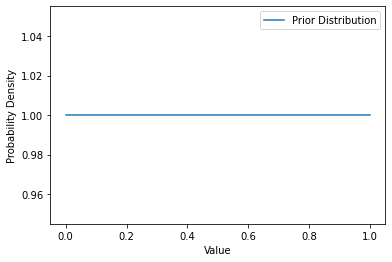

In [4]:
# Prior distribution
prior_domain = np.linspace(0,1,100)

plt.plot(prior_domain, stats.beta.pdf(prior_domain, alpha_prior, beta_prior), label = f"Prior Distribution")
plt.legend(loc = "best")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.show()

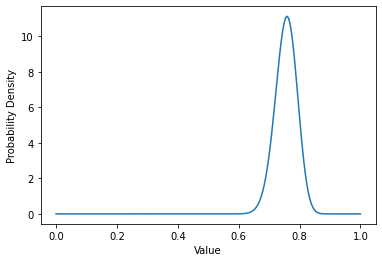

P of Success [0.75524476]
Confidence Interval (array([0.68180693]), array([0.82192261]))


In [16]:
success = 107
trials = np.array([107+34])

a_post = success + alpha_prior
b_post = trials+beta_prior -success

prior_domain = np.linspace(0,1,100)
beta_posterior = stats.beta(a_post, b_post)

plot_x = np.linspace(0, 1, 200)
plot_y = beta_posterior.pdf(plot_x)
plt.plot(plot_x, plot_y)
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.show()

print("P of Success", beta_posterior.mean())
print("Confidence Interval", beta_posterior.interval(0.95))

## Task 2: Questions, predictions, and decisions
1. **Beta-binomial posterior predictive distribution:** Use your model to predict how many patients would improve if we treated 100 new eczema patients using SIT. Express your answer as a probability distribution over the number of patients improved.
2. Use your posterior to answer these questions:
    1. What is the probability that at least two thirds of eczema patients get better with SIT?
    2. What is the probability that at least 75% of eczema patients get better with SIT?
3. Use your model to decide whether the treatment works or not. Motivate your answer.

The beta-binomial distribution has the following parameters.

* $n \in \mathbb{N}_0$ – the number of trials
* $\alpha, \beta \in \mathbb{R}^+$ – corresponding to the parameters of the beta distribution

The probability mass function of the beta-binomial distribution is

$$p(k | n,\alpha,\beta) = \binom{n}{k}\frac{B(k+\alpha,n-k+\beta)}{B(\alpha,\beta)}$$

where $B$ is the beta function. See the code below for how to evaluate the beta-binomial pmf in Python.

In [18]:
# Beta-binomial pmf with k successful trials out of n total
# trials and alpha and beta parameters.
def beta_binomial_pmf(k, n, alpha, beta):
    from scipy.special import beta as beta_function, comb
    return comb(n, k) * beta_function(k + alpha, n - k + beta) / beta_function(alpha, beta)

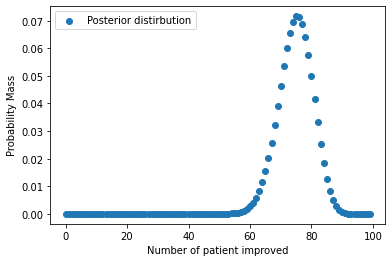

In [19]:
domain = np.arange(0,100)
posterior_func = lambda k: beta_binomial_pmf(k, domain[-1], a_post, b_post)
posterior = posterior_func(domain)
plt.scatter(domain, posterior, label = "Posterior distirbution")
plt.xlabel("Number of patient improved")
plt.ylabel("Probability Mass")
plt.legend()
plt.show()

In [21]:
print(f"Probability of 2/3 improving: {sum(posterior[int(2/3*100):]):.3f}")

print(f"Probability of 75% improving: {sum(posterior[int(0.75*100):]):.3f}")

Probability of 2/3 improving: 0.947
Probability of 75% improving: 0.534


There is limited data and no control group to be able to say whether the treatment is effective